# Projeto com feedback 4
## Formação Cientista de Dados - Big Data real time analytics with Python and Spark
### Aluno: Fernando de Almeida Noronha

Objetivo: Com o dataset de teino e teste que foi disponibilizado no curso citado em cima pela plataforma [DataScienceAcademy](https://www.datascienceacademy.com.br/course?courseid=analise-de-dados-com-python), deve-se prever o Customer Churn em uma Operadora de Telecom, extraindo a informação se um determinado cliente irá cancelar seu plano ou não, além de mostrar a probabilidade desse evento ocorrer.


&nbsp;De acordo com o artigo escrito por Swetha Amaresan que pode ser encontrado [aqui](https://blog.hubspot.com/service/what-is-customer-churn), Customer Churn ou Rotatividade do Cliente, é a porcentagem de clientes que deixaram de usar o produto de uma determinada empresa durante uma faixa de tempo. Resumidamente, a importancia dessa informação se dá ao fato de que é mais caro para uma empresa conseguir novos clientes do que manter os que já possuem, sendo assim, conseguir prever que um cliente irá sair permite uma possibilidade da empresa entrar com uma ação para impedir que isso ocorra.

#### Esse projeto será dividido em 5 etapas:
&nbsp;1- Aquisição dos dados

&nbsp;2- Limpeza e transformação dos dados


&nbsp;3- Análise exploratória dos dados


&nbsp;4- Modelagem dos dados


&nbsp;5- Interpretação dos dados

## Aquisição dos dados

In [4]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [5]:
#adicionando os nomes das colunas do dataset
columns = ["id","state","account_length","area_code","international_plan","voice_mail_plan","number_vmail_messages","total_day_minutes","total_day_calls","total_day_charge","total_eve_minutes","total_eve_calls","total_eve_charge","total_night_minutes","total_night_calls","total_night_charge","total_intl_minutes","total_intl_calls","total_intl_charge","number_customer_service_calls","churn"]

In [6]:
path = 'D:/Documentos/datascience/pythonspark/projetochurn/datasets/'

In [7]:
#leitura do arquivo de treino e teste e alterando os nomes das colunas
arq_teste = pd.read_csv(os.path.join(path,'projeto4_telecom_teste.csv'), sep = ',')
arq_treino = pd.read_csv(os.path.join(path,'projeto4_telecom_treino.csv'),sep=',')
arq_treino.columns = columns
arq_teste.columns = columns

In [8]:
arq_treino.head(5)

id state  account_length      area_code international_plan voice_mail_plan  \
0   1    KS             128  area_code_415                 no             yes   
1   2    OH             107  area_code_415                 no             yes   
2   3    NJ             137  area_code_415                 no              no   
3   4    OH              84  area_code_408                yes              no   
4   5    OK              75  area_code_415                yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churn  
0                              1     no  
1                              1     no  
2                              0     no  
3                              2     no  
4                              3     no  

[5 rows x 21 columns]

In [9]:
arq_teste.head(5)

id state  account_length      area_code international_plan voice_mail_plan  \
0   1    HI             101  area_code_510                 no              no   
1   2    MT             137  area_code_510                 no              no   
2   3    OH             103  area_code_408                 no             yes   
3   4    NM              99  area_code_415                 no              no   
4   5    SC             108  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0               70.9              123   
1                      0              223.6               86   
2                     29              294.7               95   
3                      0              216.8              123   
4                      0              197.4               78   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             12.05  ...               73             18.01   
1             38.01  ...              139             20.81   
2             50.10  ...              105             20.17   
3             36.86  ...               88             10.74   
4             33.56  ...              101             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls  churn  
0                              3     no  
1                              0     no  
2                              1     no  
3                              1     no  
4                              2     no  

[5 rows x 21 columns]

In [ ]:
original_arq_treino = arq_treino
original_arq_treino = arq_teste


## Limpeza e transformação dos dados

In [10]:
#verificando quantidade de linhas de cada coluna
arq_treino.count()

id                               3333
state                            3333
account_length                   3333
area_code                        3333
international_plan               3333
voice_mail_plan                  3333
number_vmail_messages            3333
total_day_minutes                3333
total_day_calls                  3333
total_day_charge                 3333
total_eve_minutes                3333
total_eve_calls                  3333
total_eve_charge                 3333
total_night_minutes              3333
total_night_calls                3333
total_night_charge               3333
total_intl_minutes               3333
total_intl_calls                 3333
total_intl_charge                3333
number_customer_service_calls    3333
churn                            3333
dtype: int64

In [11]:
arq_teste.count()

id                               1667
state                            1667
account_length                   1667
area_code                        1667
international_plan               1667
voice_mail_plan                  1667
number_vmail_messages            1667
total_day_minutes                1667
total_day_calls                  1667
total_day_charge                 1667
total_eve_minutes                1667
total_eve_calls                  1667
total_eve_charge                 1667
total_night_minutes              1667
total_night_calls                1667
total_night_charge               1667
total_intl_minutes               1667
total_intl_calls                 1667
total_intl_charge                1667
number_customer_service_calls    1667
churn                            1667
dtype: int64

In [12]:
#verificando se existe id's duplicados, como não existem então eu posso remover essa coluna de index pois elas +
#+só servem como identificação
if arq_treino.duplicated('id').count() == arq_treino['id'].count():
    del arq_treino['id']
if arq_teste.duplicated('id').count() == arq_teste['id'].count():
    del arq_teste['id']

In [13]:
#verificandos e existe algum dado nulo nos arquivos de treino e teste
arq_treino.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [14]:
arq_teste.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [15]:
#mesmo processo anterior para ver se existem dados Na's
arq_treino.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [16]:
arq_teste.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [17]:
#verificando os formatos e os tipos de dados categóricos
arq_treino['state'].unique(), arq_treino['area_code'].unique(),arq_treino['international_plan'].unique(),arq_treino['voice_mail_plan'].unique(),arq_treino['churn'].unique()

(array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object))

In [18]:
#optei por utilizar o label encoder do scikit-learn para tratar os dados categóricos da coluna estado. Esse método consiste em 
#encodar variaveis entre os valores 0 e X sendo X o número de valores a serem trocados - 1.
#O link para a documentação está embaixo
#(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
le = preprocessing.LabelEncoder()
le.fit(arq_treino.state)

LabelEncoder()

In [19]:
#visualizando as classes que foram encodadas
le.classes_

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [20]:
#transformando as variaveis categóricas em variaveis quantitativas
arq_treino['state'] = le.transform(arq_treino['state'])
arq_treino['churn'] = arq_treino['churn'].map(lambda x : 0 if x=='no' else 1)
arq_treino['voice_mail_plan'] = arq_treino['voice_mail_plan'].map(lambda x : 0 if x=='no' else 1)
arq_treino['international_plan'] = arq_treino['international_plan'].map(lambda x : 0 if x=='no' else 1)
arq_treino['area_code'] =arq_treino['area_code'].map(lambda x : 0 if x=='area_code_415' else (1 if x == 'area_code_408' else 2))

In [21]:
arq_treino.churn.unique(),arq_treino.voice_mail_plan.unique(),arq_treino.voice_mail_plan.unique(), arq_treino.international_plan.unique()

(array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64))

In [22]:
arq_teste['state'] = le.transform(arq_teste['state'])
arq_teste['churn'] = arq_teste['churn'].map(lambda x : 0 if x=='no' else 1)
arq_teste['voice_mail_plan'] = arq_teste['voice_mail_plan'].map(lambda x : 0 if x=='no' else 1)
arq_teste['international_plan'] = arq_teste['international_plan'].map(lambda x : 0 if x=='no' else 1)
arq_teste['area_code'] =arq_teste['area_code'].map(lambda x : 0 if x=='area_code_415' else (1 if x == 'area_code_408' else 2))

In [23]:
arq_treino.churn.unique(),arq_treino.voice_mail_plan.unique(),arq_treino.voice_mail_plan.unique(), arq_treino.international_plan.unique()

(array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64))

## Análise exploratória dos dados

In [24]:
#verificando alguns dados como index, tipos das colunas e descrições das variaveis quantitativas
arq_treino.index

RangeIndex(start=0, stop=3333, step=1)

In [25]:
arq_treino.dtypes

state                              int32
account_length                     int64
area_code                          int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [26]:
#É possível identificar que as colunas estão em grandezas diferentes, tudo isso será tratado futuramente.
arq_treino.describe()

state  account_length    area_code  international_plan  \
count  3333.000000     3333.000000  3333.000000         3333.000000   
mean     26.059406      101.064806     0.755476            0.096910   
std      14.824911       39.822106     0.830054            0.295879   
min       0.000000        1.000000     0.000000            0.000000   
25%      14.000000       74.000000     0.000000            0.000000   
50%      26.000000      101.000000     1.000000            0.000000   
75%      39.000000      127.000000     2.000000            0.000000   
max      50.000000      243.000000     2.000000            1.000000   

       voice_mail_plan  number_vmail_messages  total_day_minutes  \
count      3333.000000            3333.000000        3333.000000   
mean          0.276628               8.099010         179.775098   
std           0.447398              13.688365          54.467389   
min           0.000000               0.000000           0.000000   
25%           0.000000               0.000000         143.700000   
50%           0.000000               0.000000         179.400000   
75%           1.000000              20.000000         216.400000   
max           1.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls        churn  
count        3333.000000                    3333.000000  3333.000000  
mean            2.764581                       1.562856     0.144914  
std             0.753773                       1.315491     0.352067  
min             0.000000                       0.000000     0.000000  
25%             2.300000                       1.000000     0.000000  
50%             2.780000                       1.000000     0.000000  
75%             3.270000                       2.000000     0.000000  
max             5.400000                       9.000000     1.000000

In [27]:
arq_teste.describe()

state  account_length    area_code  international_plan  \
count  1667.000000     1667.000000  1667.000000         1667.000000   
mean     25.876425       98.646671     0.739652            0.089982   
std      14.764224       39.400755     0.824668            0.286242   
min       0.000000        1.000000     0.000000            0.000000   
25%      13.000000       72.000000     0.000000            0.000000   
50%      26.000000       98.000000     0.000000            0.000000   
75%      39.000000      126.000000     1.000000            0.000000   
max      50.000000      238.000000     2.000000            1.000000   

       voice_mail_plan  number_vmail_messages  total_day_minutes  \
count      1667.000000            1667.000000        1667.000000   
mean          0.240552               7.067786         181.316197   
std           0.427547              13.235274          52.732174   
min           0.000000               0.000000           6.600000   
25%           0.000000               0.000000         143.750000   
50%           0.000000               0.000000         181.000000   
75%           0.000000               0.000000         215.750000   
max           1.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      1667.000000       1667.000000        1667.000000      1667.000000   
mean         99.217157         30.824337         199.949190       100.344331   
std          19.327148          8.964421          50.232869        19.637935   
min          34.000000          1.120000          22.300000        38.000000   
25%          86.000000         24.440000         165.900000        88.000000   
50%          99.000000         30.770000         200.400000       100.000000   
75%         112.000000         36.680000         232.300000       113.000000   
max         160.000000         59.760000         359.300000       169.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       1667.000000          1667.000000        1667.000000   
mean          16.995903           199.431074          99.542292   
std            4.269758            50.437010          20.717441   
min            1.900000             0.000000           0.000000   
25%           14.100000           166.600000          86.000000   
50%           17.030000           199.400000          99.000000   
75%           19.745000           233.050000         113.000000   
max           30.540000           381.600000         170.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         1667.000000         1667.000000       1667.000000   
mean             8.974559           10.310738          4.346731   
std              2.269604            2.699660          2.446252   
min              0.000000            0.000000          0.000000   
25%              7.500000            8.600000          3.000000   
50%              8.970000           10.400000          4.000000   
75%             10.490000           12.000000          5.000000   
max             17.170000           19.700000         19.000000   

       total_intl_charge  number_customer_service_calls        churn  
count        1667.000000                    1667.000000  1667.000000  
mean            2.784421                       1.585483     0.134373  
std             0.728764                       1.288179     0.341155  
min             0.000000                       0.000000     0.000000  
25%             2.320000                       1.000000     0.000000  
50%             2.810000                       1.000000     0.000000  
75%             3.240000                       2.000000     0.000000  
max             5.320000                       7.000000     1.000000

In [28]:
#Quantidade de clientes que deram churn, sendo os números 0 não churn e números 1 churns.
#O número de clientes que não são churn são bem maiores do que os churns no dataset de teste.
arq_treino.groupby('churn').size()

churn
0    2850
1     483
dtype: int64

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

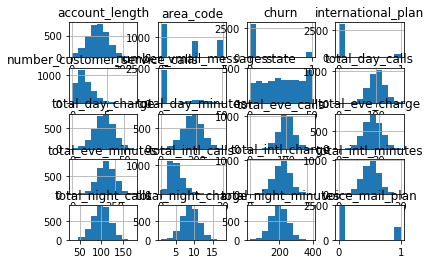

In [30]:
#Plotando o histograma entre as váriaves.
#Um ponto positivo que podemos percerber é que visualmente falando, a maioria das variaveis estão em uma distribuição normal.
arq_treino.hist()
plt.show()

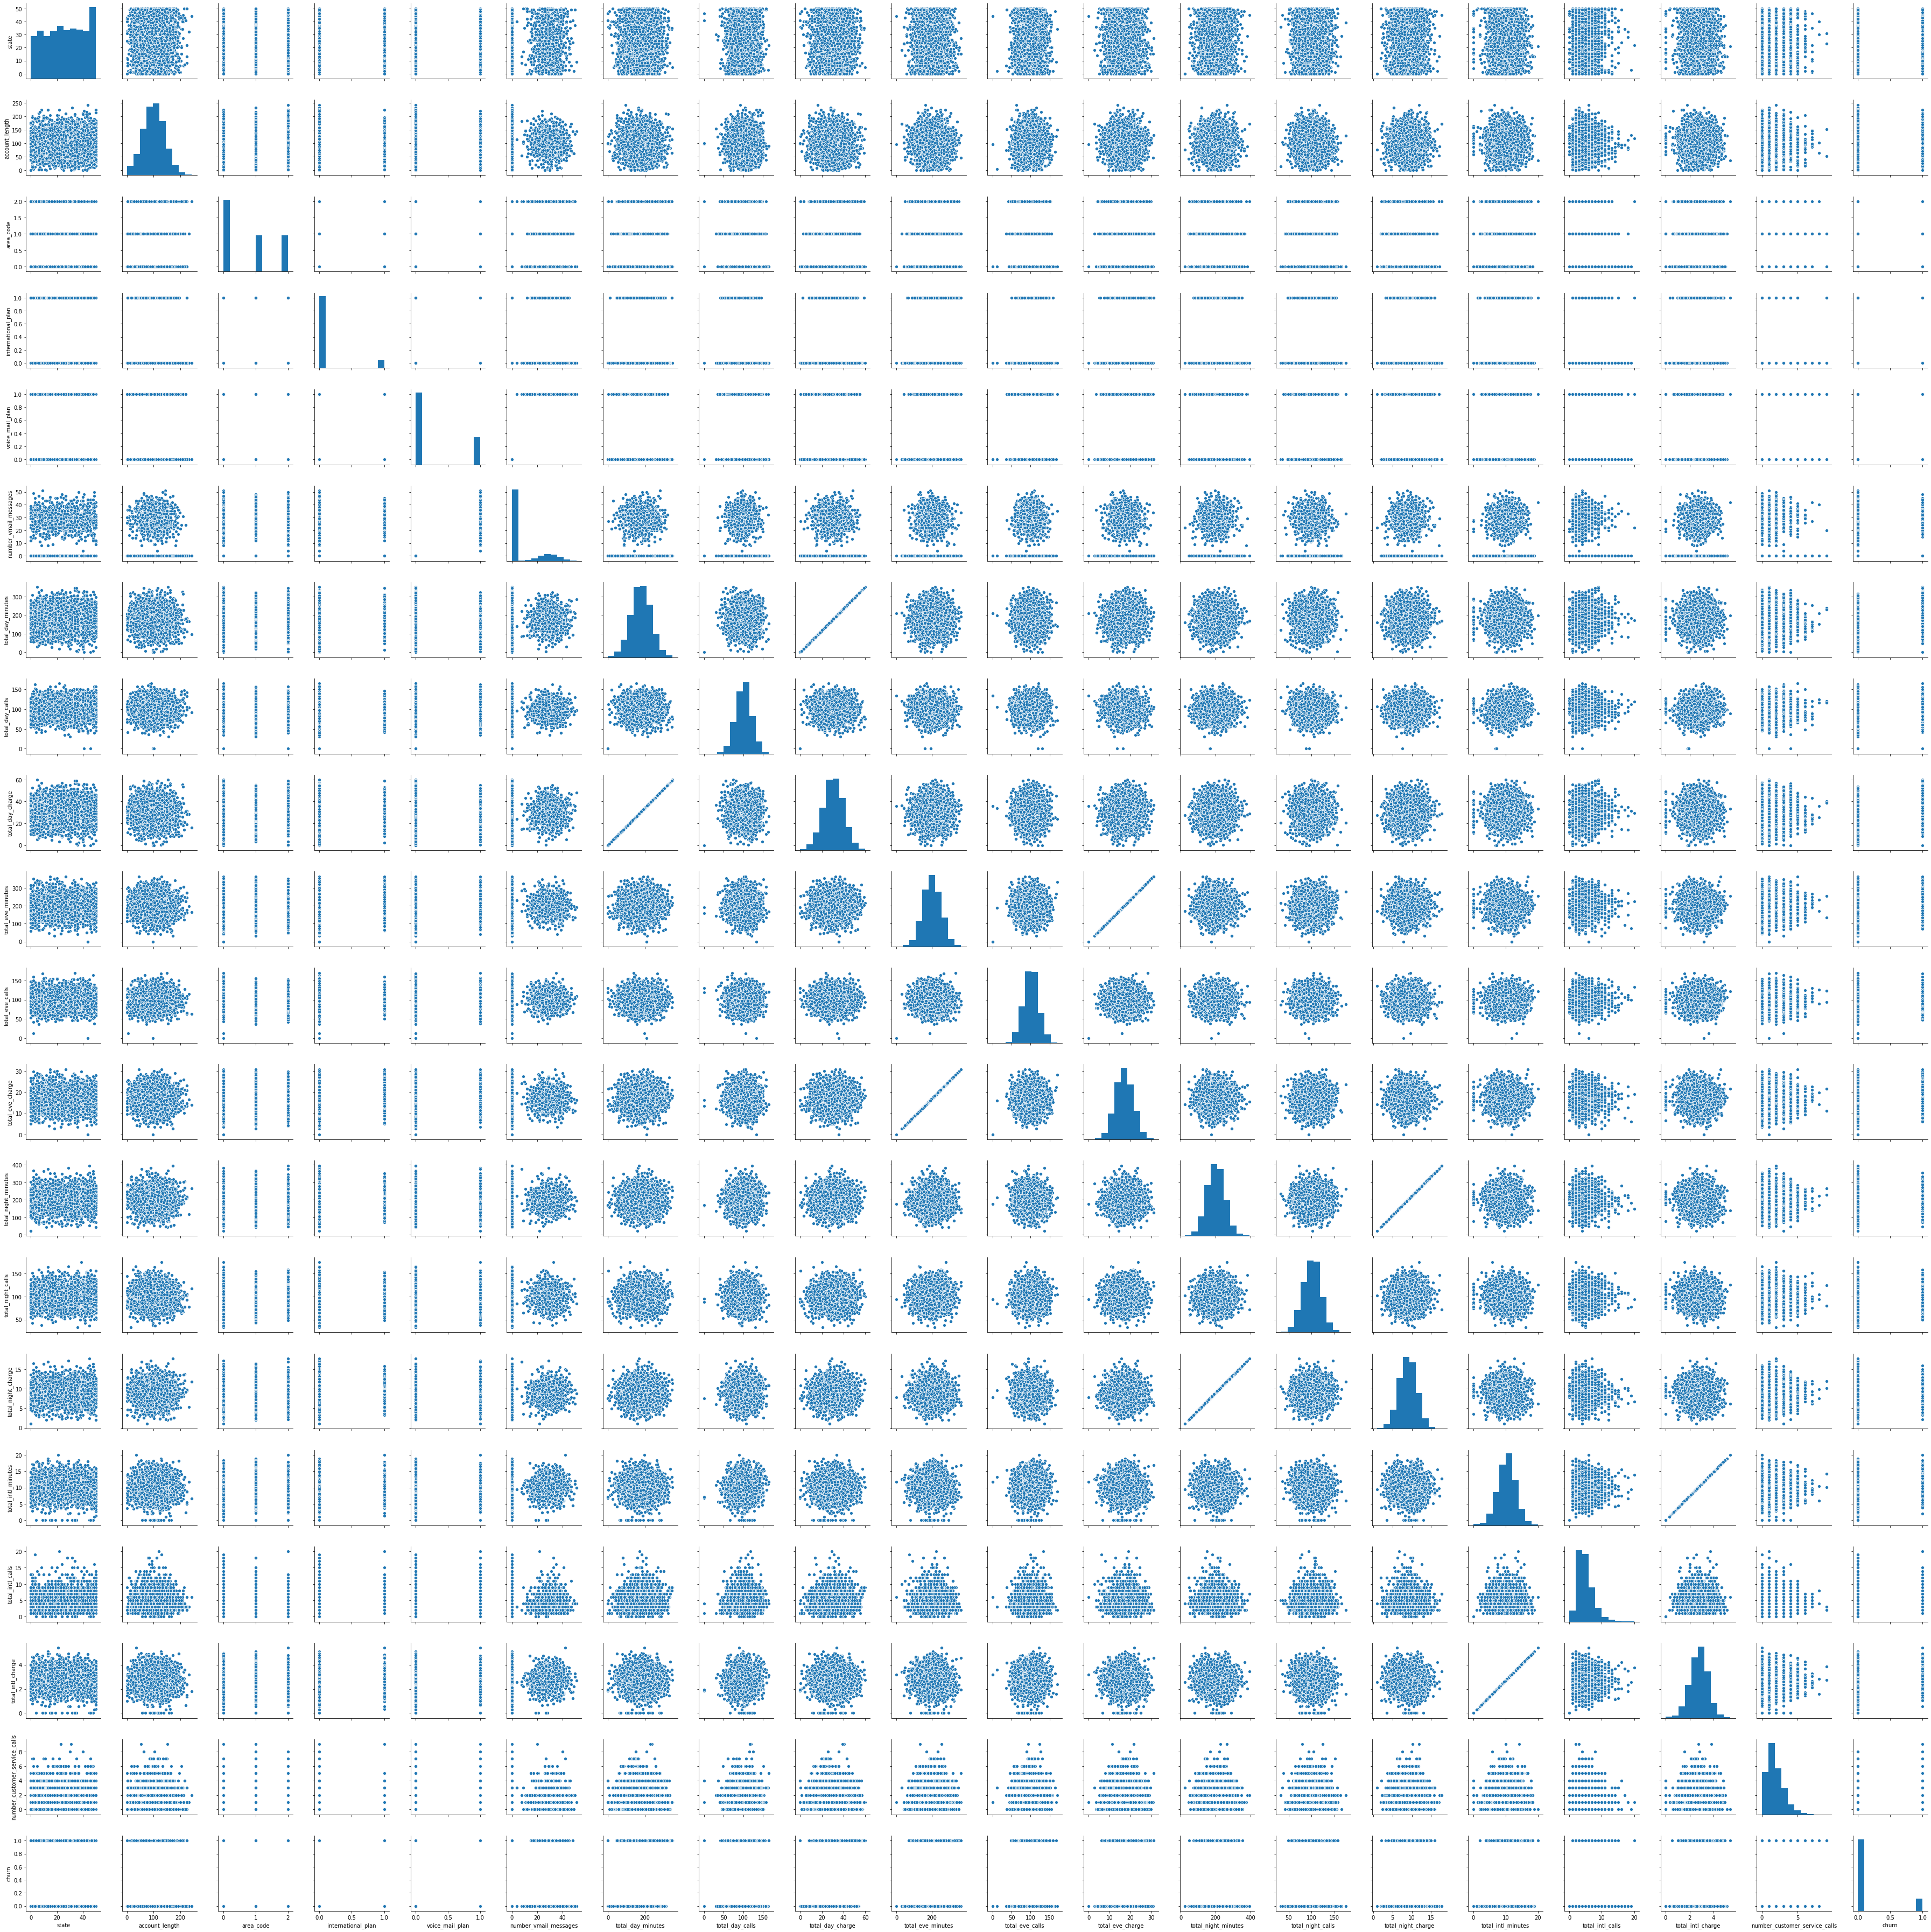

In [27]:
#Plotando um gráfico de dispersão som seaborn.
#É possível observar que (total_day_minutes e total_day_charge),(total_eve_minutes e total_eve_charge),
# (total_intl_minutes e total_intl_charge) e (total_night_minutes e total_night_charge) tem uma correlação.
#(quanto mais o X cresce, o Y também cresce).
sns.pairplot(arq_treino)

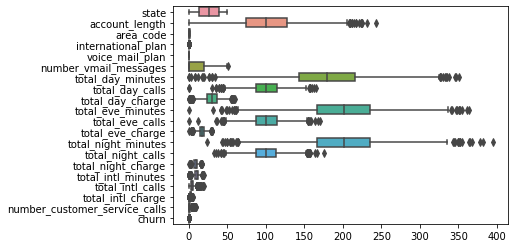

In [31]:
#Plotando um boxplot.
#É possível identificar que existem uma grande quantidade de outliers.
sns.boxplot(data = arq_treino, orient = "h")

In [32]:
arq_treino.corr(method = 'pearson')

state  account_length  area_code  \
state                          1.000000        0.003678   0.011180   
account_length                 0.003678        1.000000  -0.006303   
area_code                      0.011180       -0.006303   1.000000   
international_plan            -0.004597        0.024735   0.037860   
voice_mail_plan               -0.031664        0.002918  -0.011757   
number_vmail_messages         -0.027762       -0.004628  -0.013083   
total_day_minutes             -0.006737        0.006216  -0.025474   
total_day_calls               -0.000764        0.038470  -0.009313   
total_day_charge              -0.006736        0.006214  -0.025478   
total_eve_minutes              0.013682       -0.006757   0.005931   
total_eve_calls               -0.016268        0.019260  -0.018454   
total_eve_charge               0.013674       -0.006745   0.005954   
total_night_minutes            0.024576       -0.008955  -0.017652   
total_night_calls              0.007458       -0.013176  -0.001223   
total_night_charge             0.024572       -0.008960  -0.017668   
total_intl_minutes            -0.007834        0.009514  -0.033466   
total_intl_calls               0.013967        0.020661  -0.033531   
total_intl_charge             -0.007819        0.009546  -0.033532   
number_customer_service_calls -0.025861       -0.003796   0.018066   
churn                          0.007780        0.016541   0.007297   

                               international_plan  voice_mail_plan  \
state                                   -0.004597        -0.031664   
account_length                           0.024735         0.002918   
area_code                                0.037860        -0.011757   
international_plan                       1.000000         0.006006   
voice_mail_plan                          0.006006         1.000000   
number_vmail_messages                    0.008745         0.956927   
total_day_minutes                        0.049396        -0.001684   
total_day_calls                          0.003755        -0.011086   
total_day_charge                         0.049398        -0.001686   
total_eve_minutes                        0.019100         0.021545   
total_eve_calls                          0.006114        -0.006444   
total_eve_charge                         0.019106         0.021559   
total_night_minutes                     -0.028905         0.006079   
total_night_calls                        0.012451         0.015553   
total_night_charge                      -0.028913         0.006064   
total_intl_minutes                       0.045871        -0.001318   
total_intl_calls                         0.017366         0.007618   
total_intl_charge                        0.045780        -0.001276   
number_customer_service_calls           -0.024522        -0.017824   
churn                                    0.259852        -0.102148   

                               number_vmail_messages  total_day_minutes  \
state                                      -0.027762          -0.006737   
account_length                             -0.004628           0.006216   
area_code                                  -0.013083          -0.025474   
international_plan                          0.008745           0.049396   
voice_mail_plan                             0.956927          -0.001684   
number_vmail_messages                       1.000000           0.000778   
total_day_minutes                           0.000778           1.000000   
total_day_calls                            -0.009548           0.006750   
total_day_charge                            0.000776           1.000000   
total_eve_minutes                           0.017562           0.007043   
total_eve_calls                            -0.005864           0.015769   
total_eve_charge                            0.017578           0.007029   
total_night_minutes                         0.007681           0.004323   
total_night_calls                         

In [33]:
arq_treino.skew()

state                           -0.064618
account_length                   0.096606
area_code                        0.481933
international_plan               2.726332
voice_mail_plan                  0.999140
number_vmail_messages            1.264824
total_day_minutes               -0.029077
total_day_calls                 -0.111787
total_day_charge                -0.029083
total_eve_minutes               -0.023877
total_eve_calls                 -0.055563
total_eve_charge                -0.023858
total_night_minutes              0.008921
total_night_calls                0.032500
total_night_charge               0.008886
total_intl_minutes              -0.245136
total_intl_calls                 1.321478
total_intl_charge               -0.245287
number_customer_service_calls    1.091359
churn                            2.018356
dtype: float64

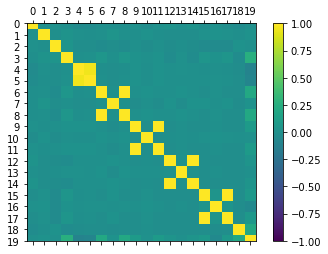

In [34]:
correlations = arq_treino.corr()
# Plot
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 20, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(columns)
#ax.set_yticklabels(columns)
plt.show()

In [ ]:
p = pd.DataFrame(standardX, columns = columns[1:-1])

p.head()


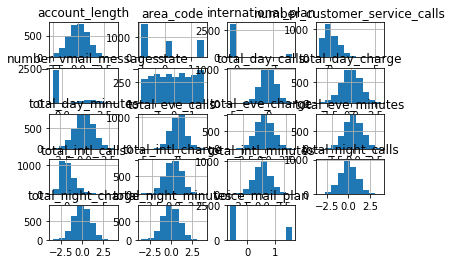

In [62]:
p.hist()
plt.show()

In [64]:
arq_semchurn = arq_treino.iloc[:,:-1]

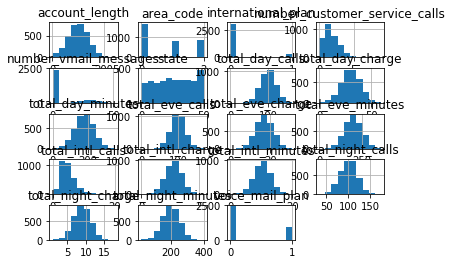

In [65]:
arq_semchurn.hist()
plt.show()

## Modelagem de dados

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

Eu dividi a modelagem de dados em 3 tipos:
1- somente regressão logística
2- feature selection e otimização de parâmetro
3- feature selection, PCA e otimização de parâmetro

In [37]:
#separando o dataset de treino em arrays e separando a variavel preditora das outras variaveis
array = arq_treino.values
array_teste = arq_teste.values
X_train = array[:,:-1]
Y_train = array[:,-1]
X_test = array_teste[:,:-1]
Y_test = array_teste[:,-1]

In [38]:
#Os dados estão em grandezas diferentes, devemos colocá-los em um mesmo padrão, podemos utilizar normalização ou padronização
#Iremos utilizar a padronização pelo fato de que existem algumas distribuições assimétricas, assim deixando elas com uma média
#igual a 0 e um desvio padrão de 1.
#(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
scaler = StandardScaler().fit(X_train)
standardX = scaler.transform(X_train)
standardX_test = scaler.transform(X_test)

1- somente regressão logística

In [39]:
#aplicando o modelo de regressão logística e treinando com o dataset tratado.
modelo_padrao = LogisticRegression()
modelo_padrao.fit(standardX, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
modelo_padrao.score(standardX_test,Y_test)

0.8710257948410318

2- somente otimização de parâmetro

In [41]:
distributions = dict(C=uniform(),penalty=['l2', 'l1'],class_weight=['balanced',None])
seed = 7
iterations = 300

In [42]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
otimizacao = RandomizedSearchCV(estimator = LogisticRegression(), 
                             param_distributions = distributions, 
                             n_iter = iterations,
                             random_state = seed)
otimizacao.fit(standardX, Y_train)
print('finalizado')

finalizado


In [43]:
otimizacao.score(standardX_test,Y_test)

0.8722255548890222

In [44]:
print('melhores parâmetros:',otimizacao.best_estimator_)

melhores parâmetros: LogisticRegression(C=0.09226234584675208, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [45]:
modelo_otimizacao = LogisticRegression(C=0.09226234584675208, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

3- feature selection e otimização de parâmetro

In [46]:
#modelo_selecao_variavel
from sklearn.feature_selection import RFE
# RFE
rfe = RFE(modelo_otimizacao)#,4)
fit = rfe.fit(standardX, Y_train)

# Print dos resultados
print("Variáveis Preditoras:", arq_treino.columns[0:-1])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

Variáveis Preditoras: Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')
Variáveis Selecionadas: [False False False  True  True False  True False  True False False  True
  True False False False  True  True  True]
Ranking dos Atributos: [11  5 10  1  1  8  1  4  1  3  9  1  1  7  2  6  1  1  1]
Número de Melhores Atributos: 9


In [47]:
fs= standardX[:,fit.support_]
fs_test= standardX_test[:,fit.support_]

In [48]:
fs.shape

(3333, 9)

In [49]:
otimizacao_fs = RandomizedSearchCV(estimator = modelo_padrao, 
                             param_distributions = distributions, 
                             n_iter = iterations,
                             random_state = seed)
otimizacao_fs.fit(fs, Y_train)
print('finalizado')

finalizado


In [50]:
otimizacao_fs.score(fs_test,Y_test)

0.8722255548890222

4- fs, pca e oh

In [51]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
fit = pca.fit(fs)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.22285646 0.12089126 0.11478316 0.11241018]
[[-0.06959807  0.00119851 -0.70509046 -0.70509062 -0.01152251 -0.00410932
  -0.01245729  0.0105705   0.02080267]
 [ 0.55388657  0.15568591 -0.03227954 -0.0322782   0.19187793 -0.3155473
   0.41641802  0.51074571 -0.31021818]
 [-0.05790294  0.59877958 -0.00968098 -0.00967587  0.52543713  0.26036061
  -0.07473502 -0.34604457 -0.41075411]
 [ 0.14575862 -0.07029333 -0.00297432 -0.00297098  0.51658414 -0.63614377
  -0.30190395 -0.23998165  0.39181672]]


In [52]:
fs_pca_teste = fit.transform(fs_test)

In [87]:
otimizacao_pca = RandomizedSearchCV(estimator = LogisticRegression(), 
                             param_distributions = distributions, 
                             n_iter = iterations,
                             random_state = seed)
otimizacao_pca.fit(fit.transform(fs), Y_train)
print('finalizado')

finalizado


In [88]:
otimizacao_pca.score(fs_pca_teste,Y_test)

0.8704259148170366

## Interpretação dos dados

In [62]:
modelo_otimizacao.score(standardX_test,Y_test)

In [57]:
modelo_otimizacao.predict_proba(standardX_test)

array([[0.92359858, 0.07640142],
       [0.93597277, 0.06402723],
       [0.7802143 , 0.2197857 ],
       ...,
       [0.94351965, 0.05648035],
       [0.96180068, 0.03819932],
       [0.99312626, 0.00687374]])

In [55]:
modelo.predict(standardX_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [56]:
Y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [56]:
# Curva ROC 
# A Curva ROC permite analisar a métrica AUC (Area Under the Curve).
# Essa é uma métrica de performance para classificação binária, em que podemos definir as classes em positiavs e negativas.
# Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity.
# Sensitivity é a taxa de verdadeiros positivos (Tstâncias positivas da primeira classe que foram previstas corretamente.
# Specifity é a taxa de verdadeiros negativos (TN). Esse éP). Ese é o número de in o número de instâncias da segunda classe que foram previstas corretamente.
# Valores acima de 0.5 indicam uma boa taxa de previsão.
from sklearn.metrics import roc_auc_score

In [155]:
r1 = roc_auc_score(Y_test,modelo_padrao.predict(standardX_test))
r1

0.5823154885654885

In [156]:
r2 = roc_auc_score(Y_test,otimizacao.predict(standardX_test))
r2

0.5754659192159193

In [157]:
r3 = roc_auc_score(Y_test,otimizacao_fs.predict(fs_test))
r3

0.5754659192159193

In [158]:
r4 = roc_auc_score(Y_test,otimizacao_pca.predict(fs_pca_teste))
r4

0.5235140703890704

In [106]:
otimizacao_pca.predict_proba(fs_pca_teste)

array([[0.9587245 , 0.0412755 ],
       [0.70430518, 0.29569482],
       [0.86644483, 0.13355517],
       ...,
       [0.92364622, 0.07635378],
       [0.91946189, 0.08053811],
       [0.95432137, 0.04567863]])

In [127]:
arq_teste.head(1)

state  account_length  area_code  international_plan  voice_mail_plan  \
0     11             101          2                   0                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0               70.9              123   

   total_day_charge  total_eve_minutes  ...  total_night_calls  \
0             12.05              211.9  ...                 73   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0               10.62                10.6                 3   

   total_intl_charge  number_customer_service_calls  churn  predict  \
0               2.86                              3      0      0.0   

   prob churn  prob não churn  
0         0.0             0.0  

[1 rows x 23 columns]

In [107]:
arq_teste[arq_teste['predict']==1.0]

state  account_length  area_code  international_plan  voice_mail_plan  \
207      21              79          2                   1                0   
295      30             127          0                   1                0   
359      15             116          0                   0                0   
787       2              32          0                   1                0   
857      43              72          0                   1                0   
885      50              72          2                   1                0   
964      40             105          1                   1                0   
974      49             176          2                   0                0   
1013     20              78          2                   0                0   
1038     34             138          0                   1                0   
1073     16             116          1                   1                0   
1153     32             143          0                   0                0   
1586     31              77          0                   1                0   
1626     32             137          1                   1                0   

      number_vmail_messages  total_day_minutes  total_day_calls  \
207                       0              300.4              113   
295                       0              324.3              107   
359                       0              271.0              114   
787                       0              265.5               75   
857                       0              286.1              101   
885                       0              274.0               75   
964                       0              274.0              156   
974                       0              304.2              111   
1013                      0              238.9               96   
1038                      0              261.1               96   
1073                      0              232.2               98   
1153                      0              271.7               67   
1586                      0              323.7              106   
1626                      0              312.4              110   

      total_day_charge  total_eve_minutes  ...  total_eve_charge  \
207              51.07              210.8  ...             17.92   
295              55.13              141.6  ...             12.04   
359              46.07              209.9  ...             17.84   
787              45.14              119.7  ...             10.17   
857              48.64              306.1  ...             26.02   
885              46.58              162.8  ...             13.84   
964              46.58              263.0  ...             22.36   
974              51.71              306.6  ...             26.06   
1013             40.61              196.1  ...             16.67   
1038             44.39              170.9  ...             14.53   
1073             39.47              244.7  ...             20.80   
1153             46.19              189.1  ...             16.07   
1586             55.03              139.2  ...             11.83   
1626             53.11              231.1  ...             19.64   

      total_night_minutes  total_night_calls  total_night_charge  \
207                 173.4                121                7.80   
295                 207.6                 90                9.34   
359                 193.5                109                8.71   
787                 169.9                128                7.65   
857                 232.8                 89               10.48   
885                 110.0                121                4.95   
964                 195.9                 93                8.82   
974                 207.9                 98                9.36   
1013                102.4                 95                4.61   
1038                 71.1                 89                3.20   
1073                151.3                 69 

In [92]:
arq_teste['predict'] = otimizacao_pca.predict(fs_pca_teste)

In [137]:
arq_teste['prob churn'] = np.trunc(otimizacao_pca.predict_proba(fs_pca_teste)[:,1]*100)
arq_teste['prob não churn'] = np.trunc(otimizacao_pca.predict_proba(fs_pca_teste)[:,0]*100)

In [116]:
otimizacao_pca.predict_proba(fs_pca_teste)[:,0]

array([0.9587245 , 0.70430518, 0.86644483, ..., 0.92364622, 0.91946189,
       0.95432137])

In [114]:
arq_teste.shape

(1667, 21)

In [143]:
arq_teste.tail()

state  account_length  area_code  international_plan  voice_mail_plan  \
1662     11              50          1                   0                1   
1663     49             152          0                   0                0   
1664      7              61          0                   0                0   
1665      7             109          2                   0                0   
1666     46              86          0                   0                1   

      number_vmail_messages  total_day_minutes  total_day_calls  \
1662                     40              235.7              127   
1663                      0              184.2               90   
1664                      0              140.6               89   
1665                      0              188.8               67   
1666                     34              129.4              102   

      total_day_charge  total_eve_minutes  ...  total_night_calls  \
1662             40.07              223.0  ...                116   
1663             31.31              256.8  ...                113   
1664             23.90              172.8  ...                 97   
1665             32.10              171.7  ...                 89   
1666             22.00              267.1  ...                100   

      total_night_charge  total_intl_minutes  total_intl_calls  \
1662               13.39                 9.9                 5   
1663                9.61                14.7                 2   
1664                9.56                13.6                 4   
1665               10.10                 8.5                 6   
1666                6.97                 9.3                16   

      total_intl_charge  number_customer_service_calls  churn  predict  \
1662               2.67                              2      0      0.0   
1663               3.97                              3      1      0.0   
1664               3.67                              1      0      0.0   
1665               2.30                              0      0      0.0   
1666               2.51                              0      0      0.0   

      prob churn  prob não churn  
1662         7.0            92.0  
1663        19.0            80.0  
1664         7.0            92.0  
1665         8.0            91.0  
1666         4.0            95.0  

[5 rows x 23 columns]

In [139]:
np.trunc(otimizacao_pca.predict_proba(fs_pca_teste)[:,1]*100)

array([ 4., 29., 13., ...,  7.,  8.,  4.])

In [ ]:
#média de churns previstos
#total de churns previstos
#média da probabilidade de churn
#média da probabilidade de não ocorrer churn 

In [144]:
from sklearn.metrics import confusion_matrix

In [146]:
matrix = confusion_matrix(Y_test, otimizacao_pca.predict(fs_pca_teste))
print(matrix)

[[1440    3]
 [ 213   11]]


In [148]:
matrix = confusion_matrix(Y_test, modelo_padrao.predict(standardX_test))
print(matrix)

[[1410   33]
 [ 182   42]]


In [ ]:
1440 + 11 corretos e 182 + 33 incorretos

In [160]:
from sklearn.metrics import roc_curve


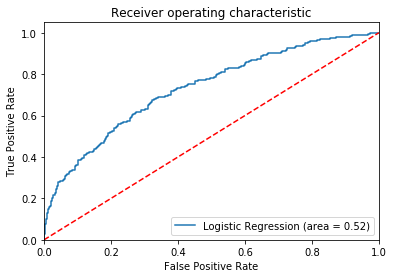

In [161]:
logit_roc_auc = r4
fpr, tpr, thresholds = roc_curve(Y_test, otimizacao_pca.predict_proba(fs_pca_teste)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

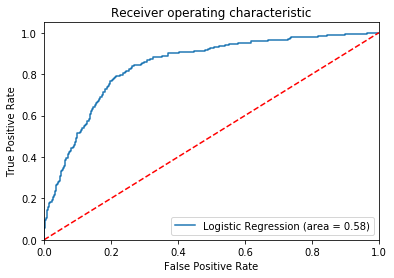

In [162]:
logit_roc_auc = r1
fpr, tpr, thresholds = roc_curve(Y_test, modelo_padrao.predict_proba(standardX_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()